In [4]:
import torch
import torch.utils.data
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils

import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

import configparser
config = configparser.ConfigParser()
config.read('config.ini')

print(torchvision.__version__)
torch.backends.mps.is_available()

0.13.1


True

In [5]:
dataroot = "data"

IMAGE_SIZE = config['default'].getint('image_size')
CHANNELS = config['default'].getint('channels')
BATCH_SIZE = config['default'].getint('batch_size')
SEED = config['default'].getint('seed')

EPOCHS = config['training'].getint('epochs')
START_LR = config['training'].getfloat('start_lr')
MAX_LR = config['training'].getfloat('max_lr')
STEPS_PER_EPOCH = config['training'].getint('steps_per_epoch')
ANNEAL_STRATEGY = config['training']['strategy']

GEN_FEATURE_MAPS = config['generator'].getint('feature_maps')
DIS_FEATURE_MAPS = config['discriminator'].getint('feature_maps')

"""
wandb.config.update({'epochs': EPOCHS, 
                     'image_size': IMAGE_SIZE, 
                     'batch_size': BATCH_SIZE,
                     'start_lr': START_LR,
                     'max_lr': MAX_LR, 
                     'strategy': ANNEAL_STRATEGY})
"""

"\nwandb.config.update({'epochs': EPOCHS, \n                     'image_size': IMAGE_SIZE, \n                     'batch_size': BATCH_SIZE,\n                     'start_lr': START_LR,\n                     'max_lr': MAX_LR, \n                     'strategy': ANNEAL_STRATEGY})\n"

Using device mps


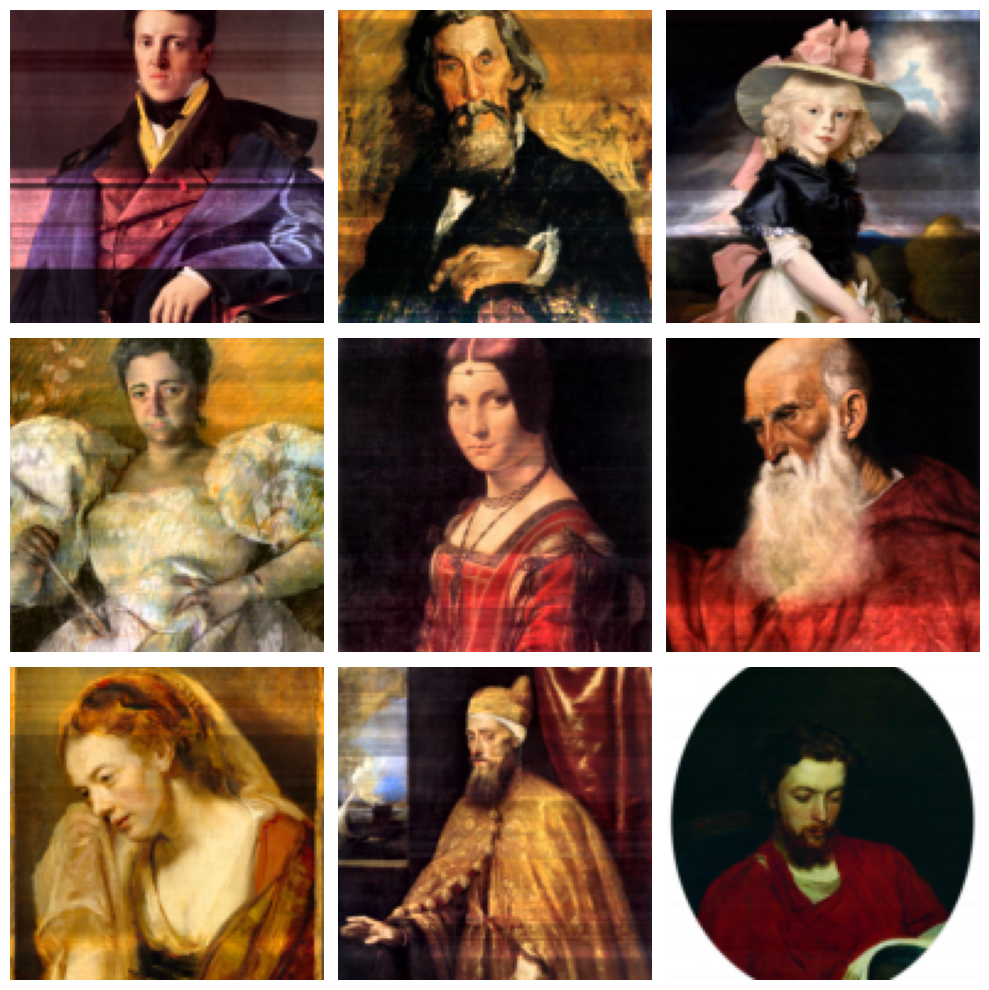

In [37]:
# We can use an image folder dataset the way we have it setup.
# Create the dataset
dataset = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(IMAGE_SIZE),
                               transforms.CenterCrop(IMAGE_SIZE),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
# Create the dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE,
                                         shuffle=True, num_workers=2)

# Decide which device we want to run on
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
print(f'Using device {device}')

i = 0
plt.figure(figsize=(10, 10))

for inputs, targets in dataloader:
    for img in inputs:
        image = img.numpy()
        # transpose image to fit plt input
        image = image.transpose((1, 2, 0))
        # normalise image
        data_min = np.min(image, axis=(1,2), keepdims=True)
        data_max = np.max(image, axis=(1,2), keepdims=True)
        scaled_data = (image - data_min) / (data_max - data_min)
        # show image
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(scaled_data)
        plt.axis('off')

        i += 1
        if i == 9:
            break

    break

plt.tight_layout()